[View in Colaboratory](https://colab.research.google.com/github/asiroliy/Advanced-Machine-Learning-with-Python/blob/master/progress_economic_ind_08_10.ipynb)

# PlaceHolder

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import statsmodels as sm
import statsmodels.api as smp
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
import scipy.stats as sc
import seaborn as sns
import statsmodels.tools.tools as smt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [0]:
# !pip install xlrd
# !pip install openpyxl
# !pip install xlsxwriter

In [17]:
from google.colab import files
files.upload()

Saving Leading ind.csv to Leading ind.csv


{'Leading ind.csv': b'\xef\xbb\xbf"LOCATION","INDICATOR","SUBJECT","MEASURE","FREQUENCY","TIME","Value","Flag Codes"\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-01",101.3073,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-02",101.6566,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-03",101.9467,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-04",102.1524,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-05",102.2758,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-06",102.3227,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-07",102.3333,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-08",102.3257,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-09",102.3074,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-10",102.2642,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-11",102.1636,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1955-12",101.984,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1956-01",101.7179,\r\n"USA","CLI","AMPLITUD","LTRENDIDX","M","1956-02",101.4045,\r\n"USA","CLI","

In [4]:
from google.colab import files
files.upload() 

{}

In [18]:
#df = pd.read_csv("USSLIND.csv",index_col=[0],parse_dates=True)
df = pd.read_csv("Leading ind.csv",index_col=[5],parse_dates=True)
df['USSLIND'] = df.Value
df = pd.DataFrame(df['USSLIND'])
df = df[df.index.year>=1967]
df = df.iloc[:-1,:]
df.head()

,USSLIND
TIME,
1967-01-01,98.80273
1967-02-01,98.71427
1967-03-01,98.73923
1967-04-01,98.88095
1967-05-01,99.12238


In [0]:
'''
df2 = pd.read_excel("economic_indicators.xlsx",index_col=[0])
df2 = df2[df2.index>=1982]
df2.head()
''';

**Business Cycle**

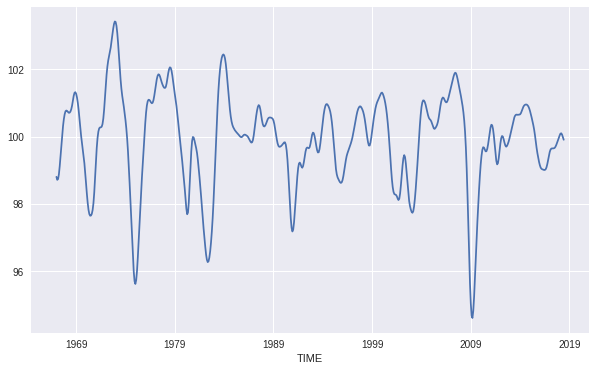

In [19]:
df.USSLIND.plot(figsize=(10,6))

In [0]:
'''df2['GDP_growth'].plot(figsize=(10,6))
plt.title('GDP growth');
''';

**Business Cycle Identification**

In [0]:
# Contraction : 2 (neg slope and below mean)
# Recovery : 3 (pos slope and below mean)
# Expansion: 0 (pos slope and above mean)
# Slowdown: 1 (neg slope and above mean)

In [0]:
'''df['bus_cycle'] = 1
mean_ld = np.mean(df['USSLIND'])
std_ld = np.std(df['USSLIND'], ddof = 1)

for i in range(3,len(df)):
    prev = df.iloc[i-1,0]
    df.iloc[i,1] = df.iloc[i-1,1]
    if(df.iloc[i,0]<=mean_ld):
      if(prev>mean_ld):
        df.iloc[i,1] = 0
      elif((df.iloc[i,0]-df.iloc[i-6:i,0].mean()>= 0)):
        df.iloc[i,1] = 1
      elif((df.iloc[i,0]-df.iloc[i-6:i,0].mean()<= 0)):
        df.iloc[i,1] = 0
    elif(df.iloc[i,0]>mean_ld):
      if(prev<mean_ld):
        df.iloc[i,1] = 2
      elif((df.iloc[i-6,0]-df.iloc[i-6:i,0].mean()>= 0)):
        df.iloc[i,1] = 3
      elif((df.iloc[i-6,0]-df.iloc[i-6:i,0].mean()<= 0)):
        df.iloc[i,1] = 2
df.iloc[-150:-100,:]''';

In [0]:
df['bus_cycle'] = 3
mean_ld = np.mean(df['USSLIND'])
std_ld = np.std(df['USSLIND'], ddof = 1)
#mean_ld = mean_ld - std_ld
for i in range(3,len(df)):
    prev = df.iloc[i-1,0]
    df.iloc[i,1] = df.iloc[i-1,1]
    if(df.iloc[i,0]<=mean_ld):
      if(prev>mean_ld):
        df.iloc[i,1] = 2
      elif((df.iloc[i,0]-df.iloc[i-1,0]>0) and (df.iloc[i-1,0]-df.iloc[i-2,0]<0)):
        df.iloc[i,1] = 3
      elif((df.iloc[i,0]-df.iloc[i-1,0]<0) and (df.iloc[i-1,0]-df.iloc[i-2,0]>0)):
        df.iloc[i,1] = 2
    elif(df.iloc[i,0]>mean_ld):
      if(prev<mean_ld):
        df.iloc[i,1] = 0
      elif((df.iloc[i,0]-df.iloc[i-1,0]<0) and (df.iloc[i-1,0]-df.iloc[i-2,0]>0)):
        df.iloc[i,1] = 1
      elif((df.iloc[i,0]-df.iloc[i-1,0]>0) and (df.iloc[i-1,0]-df.iloc[i-2,0]<0)):
        df.iloc[i,1] = 0

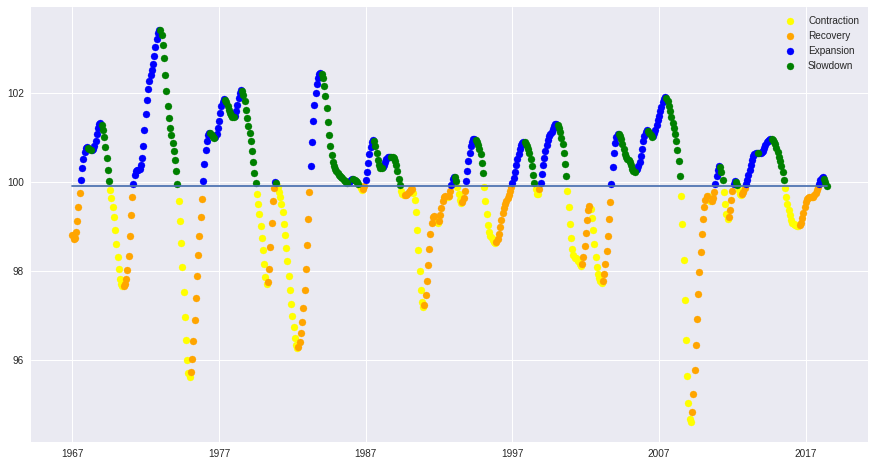

In [21]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
mean_series = np.ones(len(df.USSLIND))*mean_ld

ax1.scatter(df.index[df['bus_cycle']== 2], df.USSLIND[df['bus_cycle']== 2], c='yellow', label='Contraction')
ax1.scatter(df.index[df['bus_cycle']== 3], df.USSLIND[df['bus_cycle']== 3], c='orange', label='Recovery')
ax1.scatter(df.index[df['bus_cycle']== 0], df.USSLIND[df['bus_cycle']== 0], c='blue', label='Expansion')
ax1.scatter(df.index[df['bus_cycle']== 1], df.USSLIND[df['bus_cycle']== 1], c='green', label='Slowdown')
ax1.plot(df.index,mean_series)
plt.legend(loc='upper right');
plt.show()


In [22]:
df3 = pd.read_excel("factors_data_3.xlsx",index_col=[0],parse_dates=True)
df3 = df3.dropna()
#df3 = df3.subtract(df3.iloc[:,0], axis= 'index')
df3 = df3[df3.index.year>=1967]
df3 = np.log(1 + df3)
df3 = df3.iloc[:,2:]

#6M Forward looking returns
df_roll = df3[::-1]
df_roll = df_roll.rolling(6).sum()
df_roll = df_roll[::-1]
df3.columns = ['SMB_mthly','HML_mthly','MOM_mthly','QMJ_mthly','BAB_mthly']
df_roll = df_roll[df_roll.index.year>=1967]
df3 = df3[df3.index.year>=1967]
df3 = pd.concat([df3,df_roll],axis=1)
df3.tail()

,SMB_mthly,HML_mthly,MOM_mthly,QMJ_mthly,BAB_mthly,SMB,HML,MOM,QMJ,BAB
Date,,,,,,,,,,
2018-02-28,0.000988,-0.032632,0.039938,0.017468,-0.020261,NaN,NaN,NaN,NaN,NaN
2018-03-31,0.030907,0.008219,-0.009311,-0.003427,0.025778,NaN,NaN,NaN,NaN,NaN
2018-04-30,0.010666,0.021401,-0.012178,-0.014858,0.001031,NaN,NaN,NaN,NaN,NaN
2018-05-31,0.041483,-0.032683,0.024644,-0.004829,0.005043,NaN,NaN,NaN,NaN,NaN
2018-06-30,0.008300,0.002045,-0.022765,0.007448,0.024458,NaN,NaN,NaN,NaN,NaN


In [0]:
#df3 = pd.read_excel("msci usa factor returns.xlsx",skiprows = 6,index_col=[0],parse_dates=True)
#df3.columns = ['BAB','MOM','QMJ','HML','SMB','Temp']
#df3[['BAB','SMB']] = 0
#df3 = df3.iloc[:-2,:-1]/100
#df3 = df3[df3.index.year>=1982]
#df3 = df3.subtract(temp, axis= 'index')

#df_roll = df3[::-1]
#df_roll = df_roll.rolling(6).sum()
#df_roll = df_roll[::-1]
#df3.columns = ['BAB_mthly','MOM_mthly','QMJ_mthly','HML_mthly','SMB_mthly']
#df_roll = df_roll[df_roll.index.year>=1982]
#df3 = pd.concat([df3,df_roll],axis=1)
#df3.tail()

In [23]:
df_cut = df
df3 = df3.set_index(df_cut.index)
df_combined = pd.concat([df_cut,df3],axis=1)
df_combined.head()

,USSLIND,bus_cycle,SMB_mthly,HML_mthly,MOM_mthly,QMJ_mthly,BAB_mthly,SMB,HML,MOM,QMJ,BAB
TIME,,,,,,,,,,,,
1967-01-01,98.80273,3,0.070986,0.018340,-0.053211,-0.034445,0.013895,0.199790,-0.085088,0.057479,-0.022346,0.068087
1967-02-01,98.71427,3,0.025643,-0.027063,0.030805,-0.006717,0.025836,0.159063,-0.091909,0.101363,0.015753,0.098781
1967-03-01,98.73923,3,0.013994,-0.016921,0.011023,-0.006911,0.008035,0.144238,-0.052206,0.061244,0.027480,0.095353
1967-04-01,98.88095,3,0.003801,-0.029560,0.008307,0.026938,0.016918,0.150899,-0.058848,0.074583,0.047769,0.108394
1967-05-01,99.12238,3,0.029920,-0.000138,0.004583,0.008020,0.019882,0.151428,-0.063043,0.099952,0.031305,0.091110


In [0]:
ret_test = df_combined[df_combined.index.year>2012]
df_combined = df_combined[df_combined.index.year<=2012]

** Factor Performance Business Cycles**

In [0]:
'''factors = ['SMB','HML','MOM','QMJ','BAB']

for i in factors:
    df_combined[i+'_ir'] = (df_combined[i])/np.std(df_combined[i])

df_combined.head()
''';

,USSLIND,SMB_mthly,HML_mthly,MOM_mthly,QMJ_mthly,BAB_mthly,SMB,HML,MOM,QMJ,BAB
Expansion,100.947873,0.005967,0.001102,0.008110,-0.000851,0.010363,0.005898,0.009855,0.044985,0.015067,0.047521
Slowdown,100.839754,-0.005203,0.002997,0.009580,0.006506,0.005113,-0.015342,0.020712,0.049200,0.039123,0.029525
Contraction,98.548868,-0.005869,0.004044,0.008255,0.011625,0.005157,0.000835,0.035014,0.011045,0.029965,0.027766
Recovery,98.704807,0.011208,0.004795,-0.003587,-0.001966,0.010725,0.043559,0.011630,0.034837,0.004002,0.088682


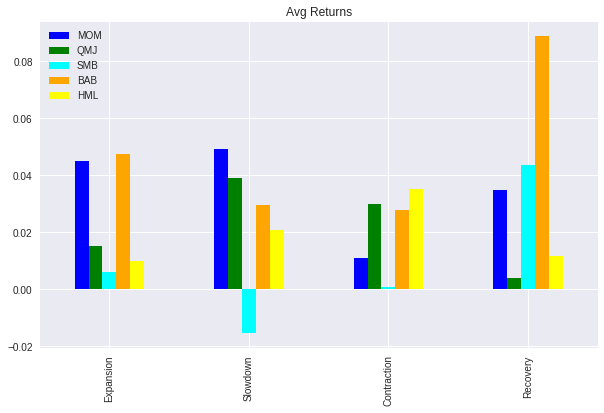

In [18]:
df_average = df_combined.groupby('bus_cycle').mean()
#df_average = df_combined.mean()
series = np.array(['Expansion','Slowdown','Contraction','Recovery'])
df_average = df_average.set_index(series)
df_average[['MOM','QMJ','SMB','BAB','HML']].plot.bar(figsize=(10,6),color=['blue','green','cyan','orange','yellow'])
plt.title('Avg Returns');
df_average

In [19]:
factors = ['SMB','HML','MOM','QMJ','BAB']

df_ranks = df_average[factors].rank(axis=1)
df_average = df_average.set_index(series)

df_ranks.columns = ['SMB_rank','HML_rank','MOM_rank','QMJ_rank','BAB_rank']

df_ranks.replace([1,2,3,4,5],[-1,-1,0,1,1],inplace = True)
df_ranks

,SMB_rank,HML_rank,MOM_rank,QMJ_rank,BAB_rank
Expansion,-1.0,-1.0,1.0,0.0,1.0
Slowdown,-1.0,-1.0,1.0,1.0,0.0
Contraction,-1.0,1.0,-1.0,1.0,0.0
Recovery,1.0,-1.0,0.0,-1.0,1.0


In [20]:
df['SMB_rank'],df['HML_rank'],df['MOM_rank'],df['QMJ_rank'],df['BAB_rank'] = [1,1,1,1,1]
for i in range(4):
  df.loc[df['bus_cycle']==i,['SMB_rank','HML_rank','MOM_rank','QMJ_rank','BAB_rank']] = df_ranks.iloc[i,:].tolist() 
df.head()

,USSLIND,bus_cycle,SMB_rank,HML_rank,MOM_rank,QMJ_rank,BAB_rank
TIME,,,,,,,
1967-01-01,98.80273,3,1.0,-1.0,0.0,-1.0,1.0
1967-02-01,98.71427,3,1.0,-1.0,0.0,-1.0,1.0
1967-03-01,98.73923,3,1.0,-1.0,0.0,-1.0,1.0
1967-04-01,98.88095,3,1.0,-1.0,0.0,-1.0,1.0
1967-05-01,99.12238,3,1.0,-1.0,0.0,-1.0,1.0


In [0]:
writer = pd.ExcelWriter('Economic cycles_signal.xlsx',engine='xlsxwriter')
df.to_excel(writer,'Economic cycles_signal')
writer.save()
from google.colab import files
files.download('Economic cycles_signal.xlsx')

**Timing Factor Return based on Economic Regime: Long Short Portfolio **

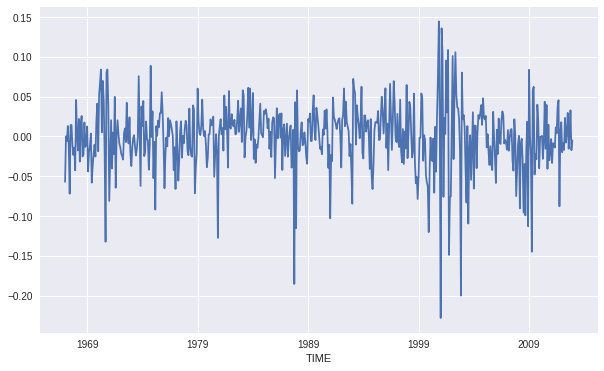

In [22]:
df_combined['economic_timing_ret'] = 0

df_combined['economic_timing_ret'][df_combined['bus_cycle']==0] \
= df_combined['QMJ_mthly'][df_combined['bus_cycle']==0] -  df_combined['MOM_mthly'][df_combined['bus_cycle']==0] 

df_combined['economic_timing_ret'][df_combined['bus_cycle']==1] \
= df_combined['BAB_mthly'][df_combined['bus_cycle']==1] -  df_combined['QMJ_mthly'][df_combined['bus_cycle']==1] 

df_combined['economic_timing_ret'][df_combined['bus_cycle']==2] \
= df_combined['BAB_mthly'][df_combined['bus_cycle']==2] -  df_combined['SMB_mthly'][df_combined['bus_cycle']==2] 

df_combined['economic_timing_ret'][df_combined['bus_cycle']==3] \
= df_combined['BAB_mthly'][df_combined['bus_cycle']==3] -  df_combined['SMB_mthly'][df_combined['bus_cycle']==3] 

df_combined['economic_timing_ret'].plot(figsize=(10,6));

** How does Market Turbulence vary with Economic Regimes?**

In [0]:
df_combined['contraction'] = 0
df_combined['contraction'][df_combined['bus_cycle']==0] = 1

df_combined['recovery'] = 0
df_combined['recovery'][df_combined['bus_cycle']==1] = 1

df_combined['expansion'] = 0
df_combined['expansion'][df_combined['bus_cycle']==2] = 1

df_combined['slowdown'] = 0
df_combined['slowdown'][df_combined['bus_cycle']==3] = 1


In [0]:
'''
df_turbulence = pd.read_excel("Turbulence.xlsx",index_col=[0],parse_dates=True)
df_turbulence = df_turbulence[['Turbulence']]

df_turbulence = df_turbulence[df_turbulence.index.year>=1967]

df_turbulence = df_turbulence.set_index(df_combined.index)
df_combined = pd.concat([df_combined,df_turbulence],axis=1)
df_combined.head()
''';

In [0]:
'''
df_average = df_combined.groupby('bus_cycle').mean()
series = np.array(['Contraction','Recovery','Expansion','Slowdown'])
df_average = df_average.set_index(series)
df_average[['Turbulence']].plot.bar(figsize=(10,6))
plt.title('Avg Turbulence by Economic Regimes');
''';

In [0]:
'''
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

df_average_new = df_combined.groupby('contraction').mean()
series = np.array([0,1])
df_average_new = df_average_new.set_index(series)
df_average_new[['Turbulence']].plot.bar(ax=axes[0,0],legend=False)
axes[0,0].set_title('Turbulence by Contraction');

df_average_new = df_combined.groupby('recovery').mean()
series = np.array([0,1])
df_average_new = df_average_new.set_index(series)
df_average_new[['Turbulence']].plot.bar(ax=axes[0,1],legend=False)
axes[0,1].set_title('Turbulence by Recovery');

df_average_new = df_combined.groupby('expansion').mean()
series = np.array([0,1])
df_average_new = df_average_new.set_index(series)
df_average_new[['Turbulence']].plot.bar(ax=axes[1,0],legend=False)
axes[1,0].set_title('Turbulence by Expansion');

df_average_new = df_combined.groupby('slowdown').mean()
series = np.array([0,1])
df_average_new = df_average_new.set_index(series)
df_average_new[['Turbulence']].plot.bar(ax=axes[1,1],legend=False)
axes[1,1].set_title('Turbulence by Slowdown');
''';

** Markov Switching Model to Study States of Turbulence **

In [0]:
'''
np.random.seed(12345)

mod_turbulence = smp.tsa.MarkovRegression(df_combined['Turbulence'], k_regimes=3)
res_turbulence = mod_turbulence.fit(search_reps=20)

print(res_turbulence.summary())
''';

In [0]:
'''
fig, axes = plt.subplots(3, figsize=(10,7))

ax = axes[0]
ax.plot(res_turbulence.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-turbulence regime')

ax = axes[1]
ax.plot(res_turbulence.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-turbulence regime')

ax = axes[2]
ax.plot(res_turbulence.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-turbulence regime')

fig.tight_layout()
''';

In [0]:
'''
res_turbulence.smoothed_marginal_probabilities.columns = ['low_prob_turbulence','mid_prob_turbulence','high_prob_turbulence']  
df_combined = pd.concat([df_combined,res_turbulence.smoothed_marginal_probabilities],axis=1)
''';

In [0]:
'''
df_combined['low_turbulence'] = 0
df_combined['mid_turbulence'] = 0
df_combined['high_turbulence'] = 0

for i in range(len(df_combined)):
    if(df_combined['low_prob_turbulence'][i]>=max(df_combined['mid_prob_turbulence'][i],df_combined['high_prob_turbulence'][i])):
        df_combined['low_turbulence'][i] =1
    elif(df_combined['mid_prob_turbulence'][i] >=max(df_combined['low_prob_turbulence'][i],df_combined['high_prob_turbulence'][i])):
        df_combined['mid_turbulence'][i] =1
    elif(df_combined['high_prob_turbulence'][i]>=max(df_combined['mid_prob_turbulence'][i],df_combined['low_prob_turbulence'][i])):
        df_combined['high_turbulence'][i] =1
df_combined.head()
''';

In [0]:
'''
corr_data_1 = df_combined[['contraction','recovery','expansion','slowdown']]
corr_data_2 = df_combined[['low_turbulence','mid_turbulence','high_turbulence']]

corr = pd.concat([corr_data_1, corr_data_2], axis=1).corr()
corr = corr[['contraction','recovery','expansion','slowdown']].ix[['low_turbulence','mid_turbulence','high_turbulence']]

#plot the heatmap

sns.heatmap(corr);
''';

** Persistance in Factor Returns and Factor Rankings**

In [39]:
factors_mthly = ['SMB_mthly','HML_mthly','MOM_mthly','QMJ_mthly','BAB_mthly']
for i in factors_mthly:
    
    model = AR(df_combined[i])
    model_fit = model.fit()
    
    print(model_fit.params[0:4])

const           0.000392
L1.SMB_mthly    0.084626
L2.SMB_mthly    0.054641
L3.SMB_mthly   -0.071351
dtype: float64
const           0.003066
L1.HML_mthly    0.181838
L2.HML_mthly   -0.048985
L3.HML_mthly   -0.013036
dtype: float64
const           0.006445
L1.MOM_mthly    0.104591
L2.MOM_mthly   -0.074135
L3.MOM_mthly    0.022850
dtype: float64
const           0.003494
L1.QMJ_mthly    0.174331
L2.QMJ_mthly   -0.026246
L3.QMJ_mthly   -0.004507
dtype: float64
const           0.004151
L1.BAB_mthly    0.104590
L2.BAB_mthly    0.041469
L3.BAB_mthly    0.078218
dtype: float64


**Slight persistance in Quality Factor Returns**

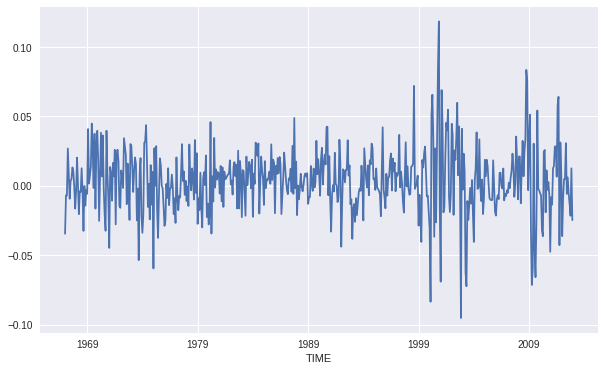

In [40]:
df_combined['QMJ_mthly'].plot(figsize=(10,6));

**Above is a mean reverting process**

In [41]:
## Factor Rankings
factors_sr = ['SMB_ir','HML_ir','MOM_ir','QMJ_ir','BAB_ir']

df_ranks = df_combined[factors].rank(axis=1)

df_ranks.columns = ['SMB_rank','HML_rank','MOM_rank','QMJ_rank','BAB_rank']

df_combined = pd.concat([df_combined,df_ranks],axis=1)

df_combined.head()



,USSLIND,bus_cycle,SMB_mthly,HML_mthly,MOM_mthly,QMJ_mthly,BAB_mthly,SMB,HML,MOM,...,economic_timing_ret,contraction,recovery,expansion,slowdown,SMB_rank,HML_rank,MOM_rank,QMJ_rank,BAB_rank
TIME,,,,,,,,,,,,,,,,,,,,,
1967-01-01,98.80273,3,0.070986,0.018340,-0.053211,-0.034445,0.013895,0.199790,-0.085088,0.057479,...,-0.057091,0,0,0,1,5.0,1.0,3.0,2.0,4.0
1967-02-01,98.71427,3,0.025643,-0.027063,0.030805,-0.006717,0.025836,0.159063,-0.091909,0.101363,...,0.000192,0,0,0,1,5.0,1.0,4.0,2.0,3.0
1967-03-01,98.73923,3,0.013994,-0.016921,0.011023,-0.006911,0.008035,0.144238,-0.052206,0.061244,...,-0.005959,0,0,0,1,5.0,1.0,3.0,2.0,4.0
1967-04-01,98.88095,3,0.003801,-0.029560,0.008307,0.026938,0.016918,0.150899,-0.058848,0.074583,...,0.013117,0,0,0,1,5.0,1.0,3.0,2.0,4.0
1967-05-01,99.12238,3,0.029920,-0.000138,0.004583,0.008020,0.019882,0.151428,-0.063043,0.099952,...,-0.010038,0,0,0,1,5.0,1.0,4.0,2.0,3.0


Note: Higher Rank is better

In [43]:
rho, pval = sc.spearmanr(df_combined[df_ranks.columns])

table_2 = pd.DataFrame(np.round(rho,2))
table_2.columns = df_ranks.columns
table_2.index = df_ranks.columns
print("Spearman Correlation")
table_2

Spearman Correlation


,SMB_rank,HML_rank,MOM_rank,QMJ_rank,BAB_rank
SMB_rank,1.00,-0.16,-0.25,-0.46,-0.15
HML_rank,-0.16,1.00,-0.61,-0.18,-0.14
MOM_rank,-0.25,-0.61,1.00,0.12,-0.21
QMJ_rank,-0.46,-0.18,0.12,1.00,-0.43
BAB_rank,-0.15,-0.14,-0.21,-0.43,1.00


In [44]:
print("P-value")
table_3 = pd.DataFrame(pval)
table_3.columns = factors
table_3.index = factors
table_3

P-value


,SMB,HML,MOM,QMJ,BAB
SMB,0.000000e+00,2.032687e-04,3.119391e-09,3.824324e-30,2.878678e-04
HML,2.032687e-04,0.000000e+00,8.534794e-57,3.104743e-05,6.545455e-04
MOM,3.119391e-09,8.534794e-57,0.000000e+00,3.331242e-03,3.823789e-07
QMJ,3.824324e-30,3.104743e-05,3.331242e-03,0.000000e+00,5.802156e-26
BAB,2.878678e-04,6.545455e-04,3.823789e-07,5.802156e-26,0.000000e+00


**3. HML and MOM rankings are also quite correlated.**

In [45]:
# Persistance in Rankings
df_combined_2 = df_combined.dropna()

for i in df_ranks.columns:
    
    model = smp.OLS(df_combined_2[i],smt.add_constant(df_combined_2[i].shift(6)),missing = 'drop')

    model_fit = model.fit()
    
    print(model_fit.params)

const       2.325816
SMB_rank    0.096552
dtype: float64
const       2.617287
HML_rank    0.080314
dtype: float64
const       3.03681
MOM_rank    0.05550
dtype: float64
const       2.452283
QMJ_rank    0.130610
dtype: float64
const       2.930154
BAB_rank    0.173307
dtype: float64


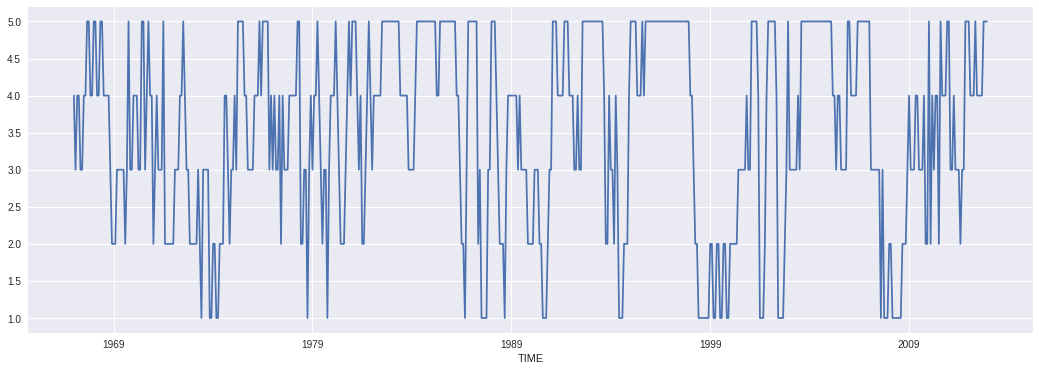

In [46]:
df_combined['BAB_rank'].plot(figsize=(18,6));

**Slight persistance in BAB ranking as well compared to others.**

*** Predicting Factor Rankings using Dispersion, Turbulence and Economic Cycle Indicators ***

In [47]:
df_combined.tail(10)

,USSLIND,bus_cycle,SMB_mthly,HML_mthly,MOM_mthly,QMJ_mthly,BAB_mthly,SMB,HML,MOM,...,economic_timing_ret,contraction,recovery,expansion,slowdown,SMB_rank,HML_rank,MOM_rank,QMJ_rank,BAB_rank
TIME,,,,,,,,,,,,,,,,,,,,,
2012-03-01,100.01580,0,-0.004310,-0.003355,0.021816,0.004866,0.038643,-0.019121,-0.022657,0.117312,...,-0.016950,1,0,0,0,2.0,1.0,5.0,3.0,4.0
2012-04-01,99.99704,1,-0.005849,-0.015873,0.032130,0.005017,0.028325,-0.009814,-0.007035,0.077589,...,0.023308,0,1,0,0,1.0,2.0,5.0,3.0,4.0
2012-05-01,99.91640,1,-0.002623,-0.013426,0.065117,0.030791,0.023104,-0.015364,0.040523,0.050343,...,-0.007687,0,1,0,0,1.0,3.0,4.0,2.0,5.0
2012-06-01,99.81345,2,0.006412,0.004352,-0.005883,-0.005770,0.010459,-0.008786,0.044474,-0.011485,...,0.004047,0,0,1,0,3.0,5.0,2.0,1.0,4.0
2012-07-01,99.73309,2,-0.019400,-0.006518,0.031242,0.006181,0.010140,0.002081,0.068151,-0.025247,...,0.029541,0,0,1,0,3.0,5.0,2.0,1.0,4.0
2012-08-01,99.69807,2,0.006649,0.012164,-0.027110,-0.005420,-0.008780,0.027404,0.086248,-0.066026,...,-0.015428,0,0,1,0,3.0,5.0,2.0,1.0,4.0
2012-09-01,99.72151,3,0.004996,0.012267,-0.017907,-0.012825,0.008043,0.019843,0.073616,-0.019613,...,0.003047,0,0,0,1,3.0,5.0,2.0,1.0,4.0
2012-10-01,99.77730,3,-0.011398,0.031685,0.004884,-0.021450,0.021421,0.022653,0.058554,0.016243,...,0.032819,0,0,0,1,3.0,4.0,2.0,1.0,5.0
2012-11-01,99.84907,3,0.003956,-0.009476,0.003289,0.012673,-0.013398,0.013460,0.025468,0.021946,...,-0.017354,0,0,0,1,2.0,4.0,3.0,1.0,5.0


In [0]:
#Best Factor: df output variable
df_combined['output'] = 0
df_combined['output'][df_combined['SMB_rank']==5] = 0
df_combined['output'][df_combined['HML_rank']==5] = 1
df_combined['output'][df_combined['MOM_rank']==5] = 2
df_combined['output'][df_combined['QMJ_rank']==5] = 3
df_combined['output'][df_combined['BAB_rank']==5] = 4

#Worst factor: df output_2 variable
df_combined['output_2'] = 0
df_combined['output_2'][df_combined['SMB_rank']==1] = 0
df_combined['output_2'][df_combined['HML_rank']==1] = 1
df_combined['output_2'][df_combined['MOM_rank']==1] = 2
df_combined['output_2'][df_combined['QMJ_rank']==1] = 3
df_combined['output_2'][df_combined['BAB_rank']==1] = 4



In [0]:
train = df_combined.iloc[:-5,:]

In [0]:
'''
x1 = train[['contraction', 'recovery', 'expansion','slowdown',\
       'low_turbulence','mid_turbulence','high_turbulence','economic_timing_ret']].shift()
x2 = train[['MKT', 'SMB', 'HML', 'UMS','QMJ']].shift(6)
#x2 = train[['SMB_mthly','HML_mthly','MOM_mthly','QMJ_mthly','BAB_mthly']].shift()

X_train = pd.concat([x1,x2],axis = 1)
X_train = smp.add_constant(X_train, prepend = False)

y_train = train['output']
''';

In [0]:
#vif_data = pd.concat([X_train,y_train],axis = 1)
#vif_data = vif_data.dropna()

In [43]:
#mdl = smp.MNLogit(y_train[6:], X_train[6:])
#mdl_fit = mdl.fit()
#mdl_fit.summary()


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train[1:], y_train[1:], test_size=0.2, random_state=42)

mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

scores = mul_lr.fit(X_train1,y_train1)

# Print the accuracy
print(mul_lr.score(X_test1, y_test1))

0.3563218390804598


In [44]:
# Prediction
X_test = df_combined[['contraction', 'recovery', 'expansion','slowdown',\
                'low_turbulence','mid_turbulence','high_turbulence',\
                'SMB_mthly','HML_mthly','MOM_mthly','QMJ_mthly','BAB_mthly','economic_timing_ret']]

X_test = smp.add_constant(X_test, prepend = False)

X_test = X_test.iloc[-1:,:]

mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train[6:],y_train[6:])
print(mul_lr.predict_proba(X_test)[0])
print(mul_lr.predict(X_test)[0])

[0.0358431  0.1526973  0.25212977 0.11692295 0.44240687]
4


In [45]:
len(df_combined[df_combined['output'] ==0])/len(df_combined)

0.0776255707762557

**BAB would dominate**


** Predicting Worst Factor**

In [46]:
y_train = train['output_2']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train[1:], y_train[1:], test_size=0.2, random_state=42)

mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

scores = mul_lr.fit(X_train1,y_train1)

# Print the accuracy
print(mul_lr.score(X_test1, y_test1))

0.42528735632183906


In [47]:
# Prediction
X_test = df_combined[['contraction', 'recovery', 'expansion','slowdown',\
                'low_turbulence','mid_turbulence','high_turbulence',\
                'SMB_mthly','HML_mthly','MOM_mthly','QMJ_mthly','BAB_mthly','economic_timing_ret']]

X_test = smp.add_constant(X_test, prepend = False)

X_test = X_test.iloc[-1:,:]

mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train[6:],y_train[6:])
print(mul_lr.predict_proba(X_test)[0])
print(mul_lr.predict(X_test)[0])

[0.36516011 0.29930116 0.09251736 0.18062538 0.06239598]
0


**Size Would Perform Poorly**

##Alternative Models

**1. SVM**



In [48]:
y_train = train['output']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train[1:], y_train[1:], test_size=0.2, random_state=42)

svm = SVC(C=10, kernel = 'rbf').fit(X_train1,y_train1)

# Print the accuracy
print(svm.score(X_test1, y_test1))

0.3793103448275862


In [49]:
X_test = df_combined[['contraction', 'recovery', 'expansion','slowdown',\
                'low_turbulence','mid_turbulence','high_turbulence',\
                'SMB_mthly','HML_mthly','MOM_mthly','QMJ_mthly','BAB_mthly','economic_timing_ret']]

X_test = smp.add_constant(X_test, prepend = False)

X_test = X_test.iloc[-1:,:]

svm = SVC(C=10, kernel = 'rbf', probability=True).fit(X_train[6:],y_train[6:])
print(svm.predict_proba(X_test)[0])
print(svm.predict(X_test)[0])

[0.0627206  0.15392187 0.24225111 0.11989599 0.42121044]
4


In [50]:
y_train = train['output_2']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train[1:], y_train[1:], test_size=0.2, random_state=42)

svm = SVC(C=10, kernel = 'rbf').fit(X_train1,y_train1)

# Print the accuracy
print(svm.score(X_test1, y_test1))

0.42528735632183906


In [51]:
svm = SVC(C=10, kernel = 'rbf').fit(X_train1,y_train1)
print(svm.score(X_test1, y_test1))

0.42528735632183906


In [52]:
X_test = df_combined[['contraction', 'recovery', 'expansion','slowdown',\
                'low_turbulence','mid_turbulence','high_turbulence',\
                'SMB_mthly','HML_mthly','MOM_mthly','QMJ_mthly','BAB_mthly','economic_timing_ret']]

X_test = smp.add_constant(X_test, prepend = False)

X_test = X_test.iloc[-1:,:]

svm_pred = SVC(C=10, kernel = 'rbf', probability=True).fit(X_train[6:],y_train[6:])
print(svm_pred.predict_proba(X_test)[0])
print(svm_pred.predict(X_test)[0])

[0.34923225 0.29207572 0.09913637 0.19070501 0.06885065]
0


**2.Random Forests**

In [53]:
rf = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 42).fit(X_train1,y_train1)
print(rf.score(X_test1, y_test1))

0.41379310344827586


In [54]:
rf = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 42).fit(X_train[6:],y_train[6:])
print(rf.predict_proba(X_test)[0])
print(rf.predict(X_test)[0])

[0.42857143 0.57142857 0.         0.         0.        ]
1


**Feature Importance**

In [55]:
print(list(zip(X_test.columns, rf.feature_importances_)))

[('contraction', 0.030598831832025292), ('recovery', 0.009951157257954138), ('expansion', 0.018733400393124842), ('slowdown', 0.008020283831208097), ('low_turbulence', 0.02605855123132), ('mid_turbulence', 0.042385810698116824), ('high_turbulence', 0.00830694354879595), ('SMB_mthly', 0.13484336662668667), ('HML_mthly', 0.13861582165680822), ('MOM_mthly', 0.15008459275645983), ('QMJ_mthly', 0.14446326898284176), ('BAB_mthly', 0.14682968499151497), ('economic_timing_ret', 0.14110828619314342), ('const', 0.0)]


In [0]:

df_combined.to_csv('df_combined.csv')

#VIF

#%%capture
#gather features
#features = "+".join(vi
#f_data.columns.difference(["output"]))

# get y and X dataframes based on this regression:
#y, X = dmatrices('output ~' + features, vif_data, return_type='dataframe')

In [0]:
# For each X, calculate VIF and save in dataframe
#vif = pd.DataFrame()
#vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif["features"] = X.columns

#vif

In [0]:
#def binning(df):

#    for cols in df.columns:
#        df['bin_'+cols] = 0
#        df['bin_'+cols][df[cols] <= df[cols].quantile(.25)] = 0
#        df['bin_'+cols][(df[cols] <= df[cols].quantile(.50)) & (df[cols] > df[cols].quantile(.25))] = 1
#        df['bin_'+cols][(df[cols] <= df[cols].quantile(.75))&(df[cols] > df[cols].quantile(.50))] = 2
#        df['bin_'+cols][(df[cols] <= df[cols].quantile(1))&(df[cols] > df[cols].quantile(.75))] = 3    

## Matrix Approach: Turbulence Signal

In [54]:
from google.colab import files
files.upload()

Saving Turbulence (1).xlsx to Turbulence (1).xlsx


{'Turbulence (1).xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x0014\xadc\xf98\x00\x00\x17\x00\x01\x00\x18\x00\x00\x00xl/worksheets/sheet1.xml\x8d\x9d]\xaf\x1e\xb7\x92\x9d\xef\xf3+\x0c\xddG&YU\xfc8\xb0=\x98\xc1\xc1 \xb9\x08\x10$\x93\xdc\xeb\xd8\xdb\x1f8\xb6eH\x9a9\xc9\xbfO\xad\xdeo\xb3w\xbd\xd5\xcb\xc8|\x00\xb6%\xedRw\x93\x8b\x8b\xc5\x87U\xdf\xfc\xd3\xff\xf9\xed\xd7\xaf\xfe\xe3\xe5\xd3\xe7_>\xfe\xfe\xed\xbb\xfa\xbe\xbc\xfb\xea\xe5\xf7\xef?\xfe\xf0\xcb\xef?}\xfb\xee\x7f\xfd\xdb\xbf\xfe\xe7\xf9\xee\xab\xcf_>\xfc\xfe\xc3\x87_?\xfe\xfe\xf2\xed\xbb\xff\xfb\xf2\xf9\xdd?}\xf7\x9f\xbe\xf9\xc7\xc7O\x7f\xff\xfc\xf3\xcb\xcb\x97\xaf\xfc\x07\xfc\xfe\xf9\xdbw?\x7f\xf9\xf2\xc7_\xbe\xfe\xfa\xf3\xf7?\xbf\xfc\xf6\xe1\xf3\xfb\x8f\x7f\xbc\xfc\xee\xbf\xf2\xe3\xc7O\xbf}\xf8\xe2\xff\xfa\xe9\xa7\xaf?\xff\xf1\xe9\xe5\xc3\x0f\xc7\x1f\xfa\xed\xd7\xaf[)\xfd\xeb\xdf>\xfc\xf2\xfb\xbb\xd7\x9f\xf0\x97O\xff??\xe3\xe3\x8f?\xfe\xf2\xfd\xcb_?~\xff\xef\xbf\xbd\xfc\xfe\xe5\xf5\x87|z\xf9\xf5\xc3\x17\xff\xeb\x7f\xfe\x

In [55]:
df3 = pd.read_excel("factors_data_3.xlsx",index_col=[0],parse_dates=True)
df3 = df3.dropna()
df3 = df3.subtract(df3.iloc[:,0], axis= 'index')
df3 = df3[df3.index.year>=1967]
df3 = df3.iloc[:,2:]

#6M Forward looking returns
df_roll = df3[::-1]
df_roll = df_roll.rolling(6).sum()
df_roll = df_roll[::-1]
df3.columns = ['SMB_mthly','HML_mthly','MOM_mthly','QMJ_mthly','BAB_mthly']
df_roll = df_roll[df_roll.index.year>=1967]
df3 = df3[df3.index.year>=1967]
df3 = pd.concat([df3,df_roll],axis=1)
df3.head()

,SMB_mthly,HML_mthly,MOM_mthly,QMJ_mthly,BAB_mthly,SMB,HML,MOM,QMJ,BAB
Date,,,,,,,,,,
1967-01-31,0.069266,0.014209,-0.056120,-0.038158,0.009692,0.183825,-0.104543,0.040052,-0.042273,0.048031
1967-02-28,0.022375,-0.030300,0.027684,-0.010294,0.022572,0.142181,-0.110267,0.083788,-0.003553,0.080837
1967-03-31,0.010192,-0.020679,0.007184,-0.010788,0.004167,0.127583,-0.070346,0.043733,0.008664,0.077826
1967-04-30,0.000609,-0.032327,0.005141,0.024104,0.013862,0.135061,-0.076155,0.058010,0.029719,0.091758
1967-05-31,0.027072,-0.003438,0.001294,0.004753,0.016781,0.134891,-0.080919,0.083218,0.012244,0.073630


In [93]:
factors_1 = ['SMB','HML','MOM','QMJ','BAB']

df_turbulence = pd.read_excel("Turbulence (1).xlsx",index_col=[0],parse_dates=True)
df_turbulence = df_turbulence[['Turbulence']]

df_turbulence = df_turbulence[df_turbulence.index.year>=1967]

df_turbulence = df_turbulence.set_index(df3.index)
df_matrix_turb = pd.concat([df3,df_turbulence],axis=1)

df_ranks = df_matrix_turb[factors_1].rank(axis=1)

df_ranks.columns = ['SMB_rank','HML_rank','MOM_rank','QMJ_rank','BAB_rank']

df_matrix_turb = pd.concat([df_matrix_turb,df_ranks],axis=1)

df_matrix_turb.head() 

,SMB_mthly,HML_mthly,MOM_mthly,QMJ_mthly,BAB_mthly,SMB,HML,MOM,QMJ,BAB,Turbulence,SMB_rank,HML_rank,MOM_rank,QMJ_rank,BAB_rank
Date,,,,,,,,,,,,,,,,
1967-01-31,0.069266,0.014209,-0.056120,-0.038158,0.009692,0.183825,-0.104543,0.040052,-0.042273,0.048031,1.604492,5.0,1.0,3.0,2.0,4.0
1967-02-28,0.022375,-0.030300,0.027684,-0.010294,0.022572,0.142181,-0.110267,0.083788,-0.003553,0.080837,0.442546,5.0,1.0,4.0,2.0,3.0
1967-03-31,0.010192,-0.020679,0.007184,-0.010788,0.004167,0.127583,-0.070346,0.043733,0.008664,0.077826,0.184125,5.0,1.0,3.0,2.0,4.0
1967-04-30,0.000609,-0.032327,0.005141,0.024104,0.013862,0.135061,-0.076155,0.058010,0.029719,0.091758,0.694956,5.0,1.0,3.0,2.0,4.0
1967-05-31,0.027072,-0.003438,0.001294,0.004753,0.016781,0.134891,-0.080919,0.083218,0.012244,0.073630,0.681926,5.0,1.0,4.0,2.0,3.0


In [94]:
np.random.seed(12345)

mod_turbulence = smp.tsa.MarkovRegression(df_matrix_turb['Turbulence'], k_regimes=3)
res_turbulence = mod_turbulence.fit(search_reps=20)

print(res_turbulence.summary())

res_turbulence.smoothed_marginal_probabilities.columns = ['low_prob_turbulence','mid_prob_turbulence','high_prob_turbulence']  
df_matrix_turb = pd.concat([df_matrix_turb,res_turbulence.smoothed_marginal_probabilities],axis=1)
df_matrix_turb.head()

                        Markov Switching Model Results                        
Dep. Variable:             Turbulence   No. Observations:                  618
Model:               MarkovRegression   Log Likelihood                -764.818
Date:                Mon, 24 Sep 2018   AIC                           1549.637
Time:                        22:08:12   BIC                           1593.902
Sample:                    01-31-1967   HQIC                          1566.845
                         - 06-30-2018                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6837      0.030     23.135      0.000       0.626       0.742
                             Regime 1 parameters    

,SMB_mthly,HML_mthly,MOM_mthly,QMJ_mthly,BAB_mthly,SMB,HML,MOM,QMJ,BAB,Turbulence,SMB_rank,HML_rank,MOM_rank,QMJ_rank,BAB_rank,low_prob_turbulence,mid_prob_turbulence,high_prob_turbulence
Date,,,,,,,,,,,,,,,,,,,
1967-01-31,0.069266,0.014209,-0.056120,-0.038158,0.009692,0.183825,-0.104543,0.040052,-0.042273,0.048031,1.604492,5.0,1.0,3.0,2.0,4.0,0.999984,1.588406e-05,3.434544e-58
1967-02-28,0.022375,-0.030300,0.027684,-0.010294,0.022572,0.142181,-0.110267,0.083788,-0.003553,0.080837,0.442546,5.0,1.0,4.0,2.0,3.0,1.000000,9.474949e-10,1.001222e-70
1967-03-31,0.010192,-0.020679,0.007184,-0.010788,0.004167,0.127583,-0.070346,0.043733,0.008664,0.077826,0.184125,5.0,1.0,3.0,2.0,4.0,1.000000,1.238733e-10,1.618992e-73
1967-04-30,0.000609,-0.032327,0.005141,0.024104,0.013862,0.135061,-0.076155,0.058010,0.029719,0.091758,0.694956,5.0,1.0,3.0,2.0,4.0,1.000000,6.908220e-09,5.332036e-68
1967-05-31,0.027072,-0.003438,0.001294,0.004753,0.016781,0.134891,-0.080919,0.083218,0.012244,0.073630,0.681926,5.0,1.0,4.0,2.0,3.0,1.000000,6.234802e-09,3.856252e-68


In [95]:
df_matrix_turb['low_turbulence'] = 0
df_matrix_turb['mid_turbulence'] = 0
df_matrix_turb['high_turbulence'] = 0

for i in range(len(df_matrix_turb)):
    if(df_matrix_turb['low_prob_turbulence'][i]>=max(df_matrix_turb['mid_prob_turbulence'][i],df_matrix_turb['high_prob_turbulence'][i])):
        df_matrix_turb['low_turbulence'][i] =1
    elif(df_matrix_turb['mid_prob_turbulence'][i] >=max(df_matrix_turb['low_prob_turbulence'][i],df_matrix_turb['high_prob_turbulence'][i])):
        df_matrix_turb['mid_turbulence'][i] =1
    elif(df_matrix_turb['high_prob_turbulence'][i]>=max(df_matrix_turb['mid_prob_turbulence'][i],df_matrix_turb['low_prob_turbulence'][i])):
        df_matrix_turb['high_turbulence'][i] =1
df_matrix_turb

,SMB_mthly,HML_mthly,MOM_mthly,QMJ_mthly,BAB_mthly,SMB,HML,MOM,QMJ,BAB,...,HML_rank,MOM_rank,QMJ_rank,BAB_rank,low_prob_turbulence,mid_prob_turbulence,high_prob_turbulence,low_turbulence,mid_turbulence,high_turbulence
Date,,,,,,,,,,,,,,,,,,,,,
1967-01-31,0.069266,0.014209,-0.056120,-0.038158,0.009692,0.183825,-0.104543,0.040052,-0.042273,0.048031,...,1.0,3.0,2.0,4.0,0.999984,1.588406e-05,3.434544e-58,1,0,0
1967-02-28,0.022375,-0.030300,0.027684,-0.010294,0.022572,0.142181,-0.110267,0.083788,-0.003553,0.080837,...,1.0,4.0,2.0,3.0,1.000000,9.474949e-10,1.001222e-70,1,0,0
1967-03-31,0.010192,-0.020679,0.007184,-0.010788,0.004167,0.127583,-0.070346,0.043733,0.008664,0.077826,...,1.0,3.0,2.0,4.0,1.000000,1.238733e-10,1.618992e-73,1,0,0
1967-04-30,0.000609,-0.032327,0.005141,0.024104,0.013862,0.135061,-0.076155,0.058010,0.029719,0.091758,...,1.0,3.0,2.0,4.0,1.000000,6.908220e-09,5.332036e-68,1,0,0
1967-05-31,0.027072,-0.003438,0.001294,0.004753,0.016781,0.134891,-0.080919,0.083218,0.012244,0.073630,...,1.0,4.0,2.0,3.0,1.000000,6.234802e-09,3.856252e-68,1,0,0
1967-06-30,0.054312,-0.032008,0.054869,-0.011890,-0.019044,0.100461,-0.102016,0.091517,0.003053,0.045738,...,1.0,4.0,2.0,3.0,1.000000,3.161244e-07,9.400583e-63,1,0,0
1967-07-31,0.027621,0.008485,-0.012384,0.000561,0.042498,0.089344,-0.084272,0.059942,-0.004539,0.063444,...,1.0,3.0,2.0,4.0,1.000000,1.509039e-09,4.360497e-70,1,0,0
1967-08-31,0.007777,0.009621,-0.012371,0.001923,0.019561,0.099100,-0.024767,0.020104,-0.012679,0.079871,...,1.0,3.0,2.0,4.0,1.000000,9.291489e-11,6.526065e-74,1,0,0
1967-09-30,0.017670,-0.026488,0.021460,0.010267,0.018099,0.065325,-0.006316,-0.001174,0.002061,0.077717,...,1.0,2.0,3.0,5.0,1.000000,2.833996e-10,2.212193e-72,1,0,0


In [96]:
for i in ['low_turbulence','mid_turbulence','high_turbulence']:
  print(df_matrix_turb[i].value_counts())

1    584
0     34
Name: low_turbulence, dtype: int64
0    588
1     30
Name: mid_turbulence, dtype: int64
0    614
1      4
Name: high_turbulence, dtype: int64


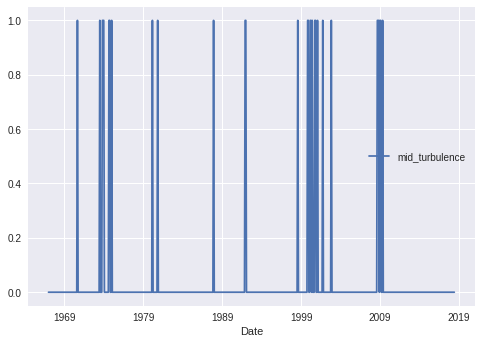

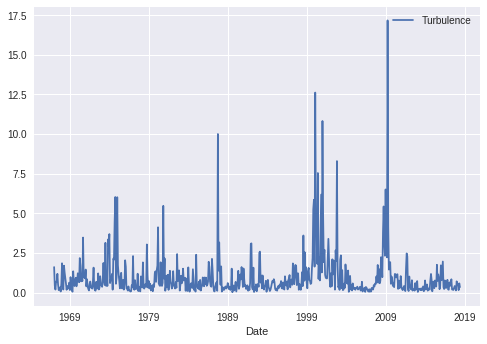

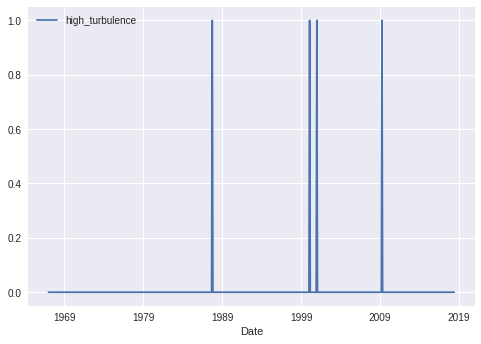

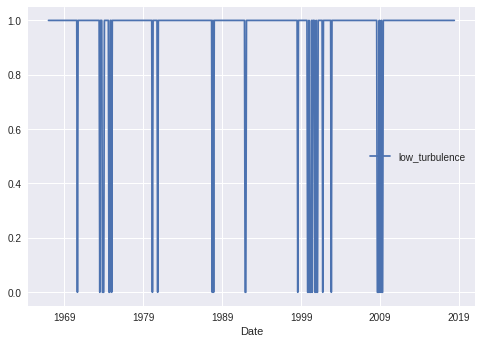

In [97]:
df_matrix_turb[['mid_turbulence']].plot()
df_matrix_turb[['Turbulence']].plot()
df_matrix_turb[['high_turbulence']].plot()
df_matrix_turb[['low_turbulence']].plot()


In [59]:
df_turb_mean = df_matrix_turb[['SMB','HML','MOM','QMJ','BAB','low_turbulence','mid_turbulence','high_turbulence']].groupby(['low_turbulence','mid_turbulence','high_turbulence']).mean()
df_ranks_mean = df_turb_mean[factors_1].rank(axis=1)

df_ranks_mean.columns = ['SMB_rank','HML_rank','MOM_rank','QMJ_rank','BAB_rank']
df_turb_mean 

SMB       HML       MOM  \
low_turbulence mid_turbulence high_turbulence                                 
0              0              1                0.056723  0.182199 -0.200250   
               1              0                0.002942  0.071097 -0.076159   
1              0              0               -0.017043 -0.010344  0.023906   

                                                    QMJ       BAB  
low_turbulence mid_turbulence high_turbulence                      
0              0              1               -0.042668 -0.019618  
               1              0                0.016868 -0.007275  
1              0              0                0.001035  0.029734

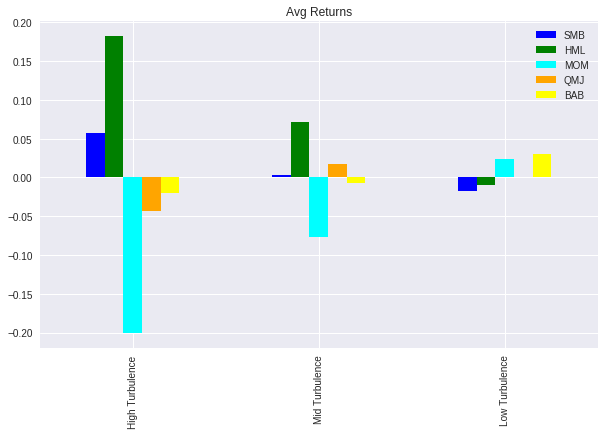

In [60]:
series2 = np.array(['High Turbulence','Mid Turbulence','Low Turbulence'])
df_turb_mean = df_turb_mean.set_index(series2)
df_turb_mean.plot.bar(figsize=(10,6),color=['blue','green','cyan','orange','yellow'])
plt.title('Avg Returns');

In [61]:
df_ranks_mean

SMB_rank  HML_rank  MOM_rank  \
low_turbulence mid_turbulence high_turbulence                                 
0              0              1                     4.0       5.0       1.0   
               1              0                     3.0       5.0       1.0   
1              0              0                     1.0       2.0       4.0   

                                               QMJ_rank  BAB_rank  
low_turbulence mid_turbulence high_turbulence                      
0              0              1                     2.0       3.0  
               1              0                     4.0       2.0  
1              0              0                     3.0       5.0

In [0]:
df_matrix_turb['SMB_turb_score'] = 0
df_matrix_turb['HML_turb_score'] = 0
df_matrix_turb['MOM_turb_score'] = 0
df_matrix_turb['QMJ_turb_score'] = 0
df_matrix_turb['BAB_turb_score'] = 0

df_ranks_mean[df_ranks_mean.columns] = df_ranks_mean[df_ranks_mean.columns].replace(3,0)
df_ranks_mean[df_ranks_mean.columns] = df_ranks_mean[df_ranks_mean.columns].replace(2,-1)
df_ranks_mean[df_ranks_mean.columns] = df_ranks_mean[df_ranks_mean.columns].replace(1,-1)
df_ranks_mean[df_ranks_mean.columns] = df_ranks_mean[df_ranks_mean.columns].replace(4,1)
df_ranks_mean[df_ranks_mean.columns] = df_ranks_mean[df_ranks_mean.columns].replace(5,1)

df_matrix_turb.loc[df_matrix_turb['low_turbulence']==1,['SMB_turb_score','HML_turb_score','MOM_turb_score','QMJ_turb_score','BAB_turb_score']] = df_ranks_mean.loc[1,:].values
df_matrix_turb.loc[df_matrix_turb['mid_turbulence']==1,['SMB_turb_score','HML_turb_score','MOM_turb_score','QMJ_turb_score','BAB_turb_score']] = df_ranks_mean.loc[0,:].loc[1,:].values
df_matrix_turb.loc[df_matrix_turb['high_turbulence']==1,['SMB_turb_score','HML_turb_score','MOM_turb_score','QMJ_turb_score','BAB_turb_score']] = df_ranks_mean.loc[0,:].loc[0,:].values

In [33]:
df_ranks_mean

SMB_rank  HML_rank  MOM_rank  \
low_turbulence mid_turbulence high_turbulence                                 
0              0              1                     1.0       1.0      -1.0   
               1              0                     0.0       1.0      -1.0   
1              0              0                    -1.0      -1.0       1.0   

                                               QMJ_rank  BAB_rank  
low_turbulence mid_turbulence high_turbulence                      
0              0              1                    -1.0       0.0  
               1              0                     1.0      -1.0  
1              0              0                     0.0       1.0

In [0]:
df_matrix_turb.to_csv('Turbulence_Signal_Matrix.csv')

In [0]:
files.download('Turbulence_Signal_Matrix.csv')

# Factor Long-Short Portfolios


In [0]:
# !rm 'output disp_stre_1.xlsx'

In [11]:
from google.colab import files
files.upload() 

Saving Economic cycles_signal.xlsx to Economic cycles_signal.xlsx
Saving Turbulence_Signal_Matrix.csv to Turbulence_Signal_Matrix.csv


{'Economic cycles_signal.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x00\xa6o\xdbsXW\x00\x00TK\x02\x00\x18\x00\x00\x00xl/worksheets/sheet1.xml\x8d\xbd\xdb\xd2$\xb7\xb1\xa5y?OA\xe3}\x17\x03\x80\xe3\xb4MR[gF\x02\x98\x8b1k\x9bC\xdfsK%\x89\xb6%\x96\x8c\xac\xde\x9ay\xfb\x89,\xfe\x88H\xc7\xf2\x95j]Qp\xc0Q\xeb\xcf\xd3\n\x0f\xc7\x17\xbf\xfb\xaf\xff\xef\xdf\xff\xf6\xdd\x7f~\xfe\xe5\xd7\x9f\xbe\xfc\xfc\xfb\xef\xdd\xa7\xed\xfb\xef>\xff\xfc\xc7/\x7f\xfa\xe9\xe7\xbf\xfc\xfe\xfb\xff\xe7\xffn\xff\xa5|\xff\xdd\xaf_\x7f\xfc\xf9O?\xfe\xed\xcb\xcf\x9f\x7f\xff\xfd\xff\xf7\xf9\xd7\xef\xff\xeb\x1f\xfe\xb7\xdf\xfd\xf3\xcb/\xff\xf1\xeb_?\x7f\xfe\xfa\xdd\x91\xe0\xe7_\x7f\xff\xfd_\xbf~\xfd\xc7\xbf\xfd\xf0\xc3\xaf\x7f\xfc\xeb\xe7\xbf\xff\xf8\xeb\xa7/\xff\xf8\xfc\xf3\x11\xf9\xf3\x97_\xfe\xfe\xe3\xd7\xe3\xff\xfe\xf2\x97\x1f~\xfd\xc7/\x9f\x7f\xfc\xd3\xb7E\x7f\xff\xdb\x0f~\xdb\xd2\x0f\x7f\xff\xf1\xa7\x9f\xbf\xff-\xc3\xbf\xfd\xf2\xbf\x92\xe3\xcb\x9f\xff\xfc\xd3\x1f?\xef_\xfe\xf8?\xff\xfe\xf9\xe7\xaf\xbf%\xf9

In [25]:
fac_ret = df_combined.iloc[:,2:7]
fac_ret.tail()
#ret_test

,SMB_mthly,HML_mthly,MOM_mthly,QMJ_mthly,BAB_mthly
TIME,,,,,
2012-08-01,0.006649,0.012164,-0.027110,-0.005420,-0.008780
2012-09-01,0.004996,0.012267,-0.017907,-0.012825,0.008043
2012-10-01,-0.011398,0.031685,0.004884,-0.021450,0.021421
2012-11-01,0.003956,-0.009476,0.003289,0.012673,-0.013398
2012-12-01,0.017279,0.028029,-0.019645,-0.024601,-0.009879


In [0]:
eco = pd.read_excel('Economic cycles_signal.xlsx',index_col=0)
eco_sig = eco.iloc[eco.index.year<=2012,2:]
eco_sig_test = eco.iloc[eco.index.year>2012,2:]

In [0]:
turb = pd.read_csv('Turbulence_Signal_Matrix.csv',index_col=0)
turb.index = pd.to_datetime(turb.index)
turb_sig = turb.iloc[turb.index.year<=2012,-5:]
turb_sig_test = turb.iloc[turb.index.year>2012,-5:]
turb_sig.columns = eco_sig.columns
turb_sig_test.columns = eco_sig_test.columns
turb_sig.set_index(fac_ret.index, inplace = True)
turb_sig_test.set_index(ret_test.index, inplace = True)

In [0]:
data_disp_stre = pd.read_excel('output disp_stre_2.xlsx',index_col = 0)
disp_rel=data_disp_stre.loc[:,'Disp_sd_S_pos':'Disp_sd_Q_pos'] 
disp_rel.insert(4,'Disp_sd_BAB',0)
disp_sig = disp_rel.iloc[disp_rel.index.year<=2012,:5]
disp_sig_test = disp_rel.iloc[disp_rel.index.year>2012,:5]
disp_sig.columns = eco_sig.columns
disp_sig_test.columns = eco_sig_test.columns
disp_sig.set_index(fac_ret.index, inplace = True)
disp_sig_test.set_index(ret_test.index, inplace = True)


Raw metric for dispersion and strength signals:

In [0]:
disp_sig_raw_test=data_disp_stre.loc[disp_rel.index.year>2012,'Disp_sd_S':'Disp_sd_Q'] 
relstr_sig_raw_test=data_disp_stre.loc[disp_rel.index.year>2012,'Stre_SMB':'Stre_BAB'] 

In [0]:

relstr_sig = data_disp_stre.loc[disp_rel.index.year<=2012,'Stre_SMB_pos':'Stre_BAB_pos']
relstr_sig_test = data_disp_stre.loc[disp_rel.index.year>2012,'Stre_SMB_pos':'Stre_BAB_pos']
relstr_sig.columns = eco_sig.columns
relstr_sig_test.columns = eco_sig_test.columns
relstr_sig.set_index(fac_ret.index, inplace = True)
relstr_sig_test.set_index(ret_test.index, inplace = True)

In [0]:
def signal_returns(fac_ret, sig_rank):
  sig_ret = fac_ret*sig_rank.values
  sig_ret = np.sum(sig_ret, axis=1)
  return sig_ret  

In [38]:
eco_ret = signal_returns(fac_ret,eco_sig)
signal_ret = pd.DataFrame(eco_ret, columns=['Eco Signal'])
signal_ret['Turb Signal'] = signal_returns(fac_ret,turb_sig)
signal_ret['Disp Signal'] = signal_returns(fac_ret,disp_sig)
signal_ret['Strength Signal'] = signal_returns(fac_ret,relstr_sig)
signal_ret.tail()

,Eco Signal,Turb Signal,Disp Signal,Strength Signal
TIME,,,,
2012-08-01,0.023845,-0.054701,-0.051342,-0.054701
2012-09-01,0.013597,-0.027128,0.002188,-0.027128
2012-10-01,-0.000213,0.006018,0.069417,0.059152
2012-11-01,-0.012640,-0.004589,-0.004047,-0.038836
2012-12-01,-0.074832,-0.074832,0.005794,0.062396


In [0]:
def train_plot(ser):
  ser.plot(kind='kde')
  plt.title(ser.name)
  return ser.describe()

count    552.000000
mean       0.013962
std        0.063586
min       -0.322623
25%       -0.019821
50%        0.014604
75%        0.046148
max        0.257703
Name: Eco Signal, dtype: float64

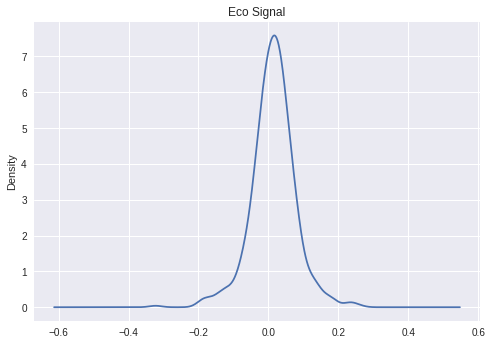

In [40]:
train_plot(signal_ret['Eco Signal'])

count    552.000000
mean       0.017895
std        0.081222
min       -0.242353
25%       -0.015752
50%        0.018433
75%        0.051004
max        0.796995
Name: Turb Signal, dtype: float64

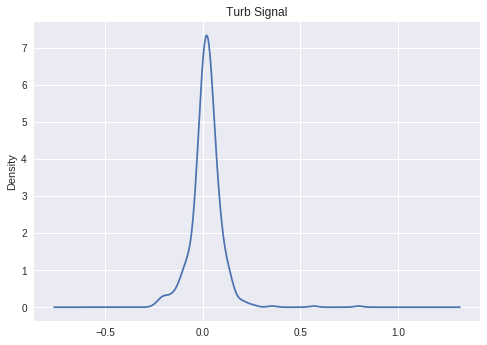

In [41]:
train_plot(signal_ret['Turb Signal'])

count    552.000000
mean       0.005022
std        0.067869
min       -0.567299
25%       -0.027957
50%        0.006389
75%        0.035714
max        0.558159
Name: Disp Signal, dtype: float64

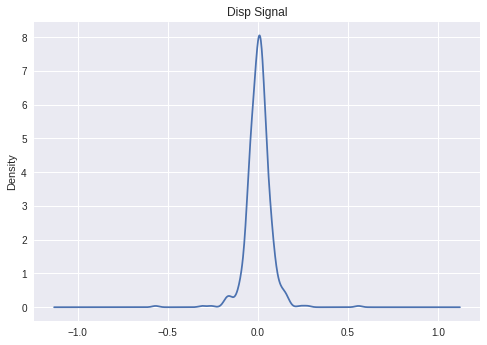

In [42]:
train_plot(signal_ret['Disp Signal'])

count    552.000000
mean       0.044480
std        0.083835
min       -0.277984
25%        0.002223
50%        0.038817
75%        0.077445
max        0.807418
Name: Strength Signal, dtype: float64

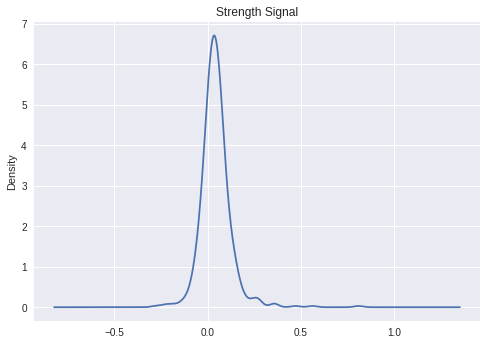

In [43]:
train_plot(signal_ret['Strength Signal'])

In [44]:
combined_ret = signal_ret.mean(axis=1)
combined_ret.name = 'Combined Portfolio'
combined_ret.tail()

TIME
2012-08-01   -0.034225
2012-09-01   -0.009617
2012-10-01    0.033594
2012-11-01   -0.015028
2012-12-01   -0.020368
Freq: MS, Name: Combined Portfolio, dtype: float64

count    552.000000
mean       0.020340
std        0.042566
min       -0.157257
25%       -0.000925
50%        0.018346
75%        0.038862
max        0.310165
Name: Combined Portfolio, dtype: float64

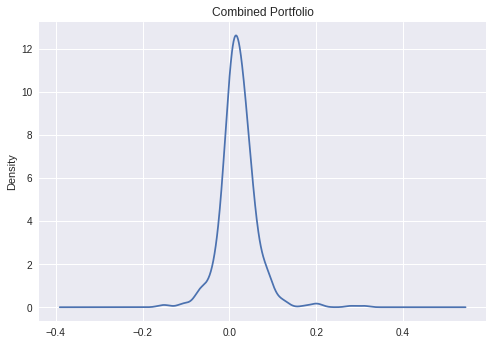

In [45]:
train_plot(combined_ret)

### Testing the signal

In [46]:
fac_test = ret_test.iloc[:,2:7]
eco_ret_test = signal_returns(fac_test,eco_sig_test)
signal_ret_test = pd.DataFrame(eco_ret_test, columns=['Eco Signal'])
signal_ret_test['Turb Signal'] = signal_returns(fac_test,turb_sig_test)
signal_ret_test['Disp Signal'] = signal_returns(fac_test,disp_sig_test)
signal_ret_test['Strength Signal'] = signal_returns(fac_test,relstr_sig_test)
signal_ret_test.tail()

,Eco Signal,Turb Signal,Disp Signal,Strength Signal
TIME,,,,
2018-02-01,0.051320,0.051320,-0.011150,0.089050
2018-03-01,-0.022658,-0.022658,-0.028572,-0.051863
2018-04-01,-0.059102,-0.043213,0.008055,-0.043213
2018-05-01,0.011015,0.020888,0.103640,0.103640
2018-06-01,-0.025662,-0.008652,0.025662,-0.023959


In [0]:
def max_drawdown(ser):
  max_cur = pd.expanding_max(ser)
  dd_cur = ser - max_cur
  return dd_cur.min()

In [0]:
def signal_plot(ser, fac):
  rolling_dd = pd.rolling_apply(ser, 6, max_drawdown, min_periods=1)
  fig,ax = plt.subplots(nrows = 3, figsize = (15, 10)) 
  ax[0].plot(ser,'g')
  for i in fac.columns:
    ax[1].plot(fac[i].cumsum(),label = i)
  ax[1].plot(ser.cumsum(), label = ser.name)
  ax[1].legend(loc = 'upper left')
  ax[2].plot(rolling_dd, 'r')
  ax[0].set_ylabel('Retuns')
  ax[1].set_ylabel('Cumulative Returns')
  ax[2].set_ylabel('6 month Rolling Drawdown')
  ax[0].set_title(ser.name)

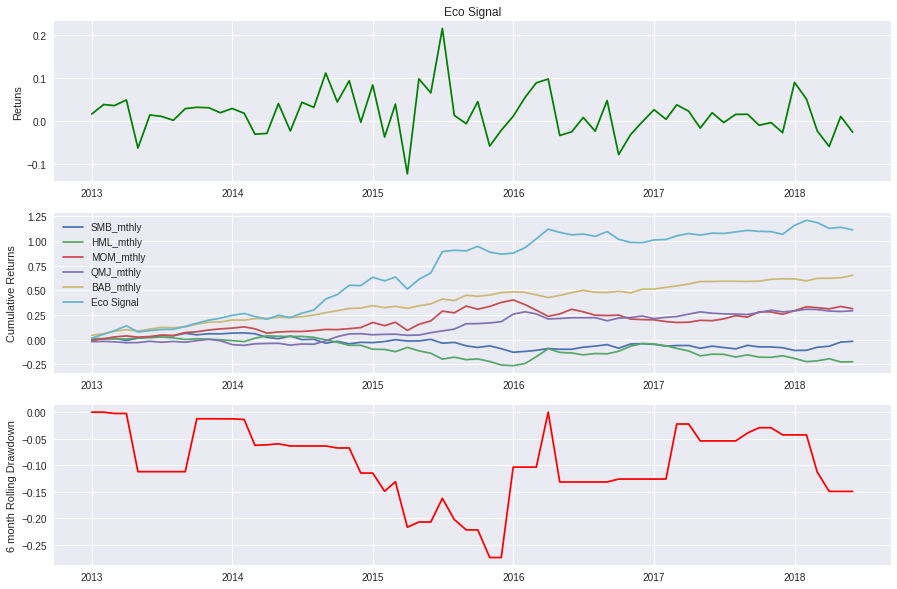

In [49]:
signal_plot(signal_ret_test['Eco Signal'],fac_test)

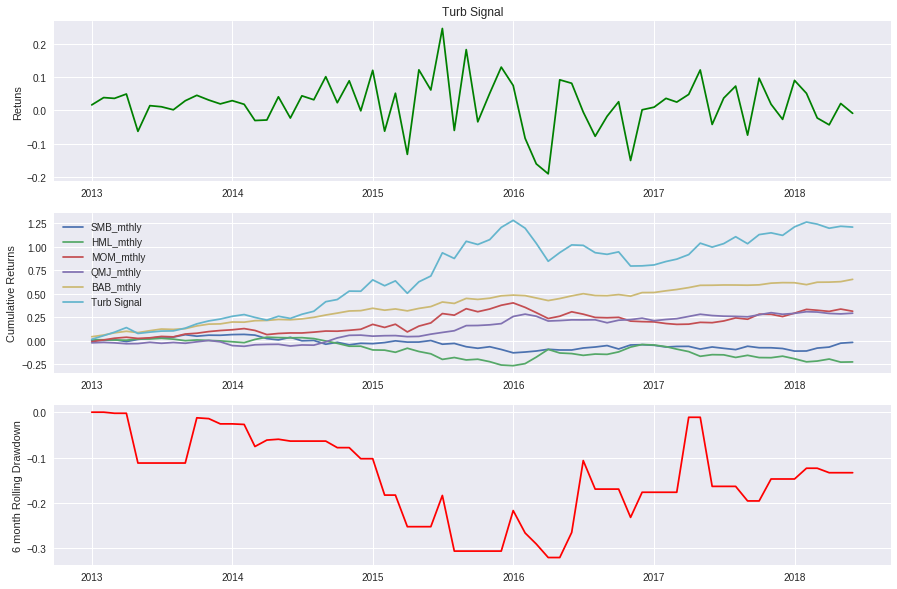

In [50]:
signal_plot(signal_ret_test['Turb Signal'],fac_test)

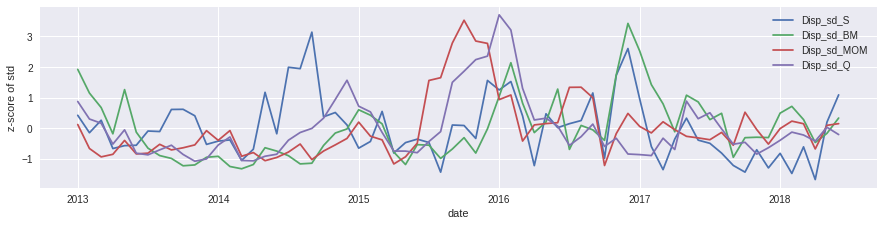

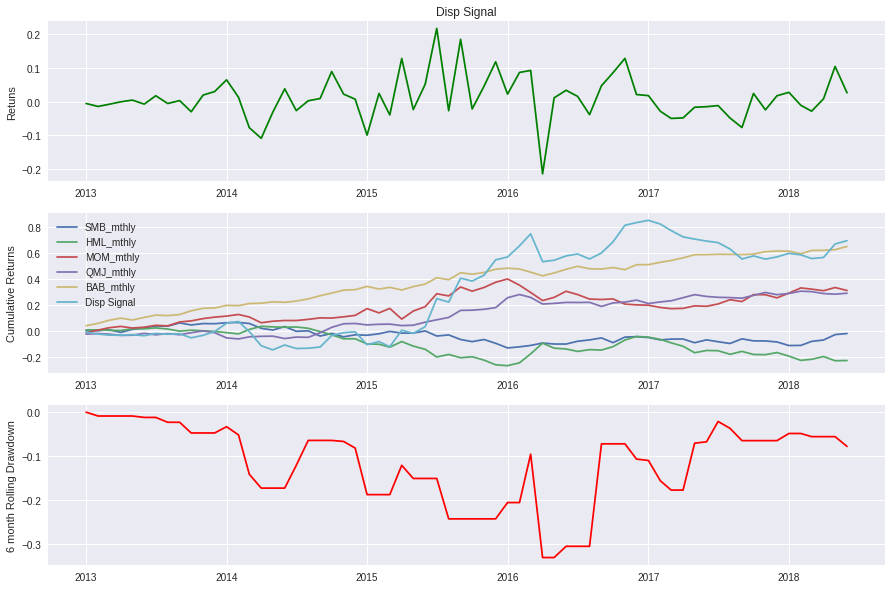

In [63]:
ax=disp_sig_raw_test.plot(figsize = (15, 10/3.))
ax.set(xlabel="date", ylabel="z-score of std")
signal_plot(signal_ret_test['Disp Signal'],fac_test)

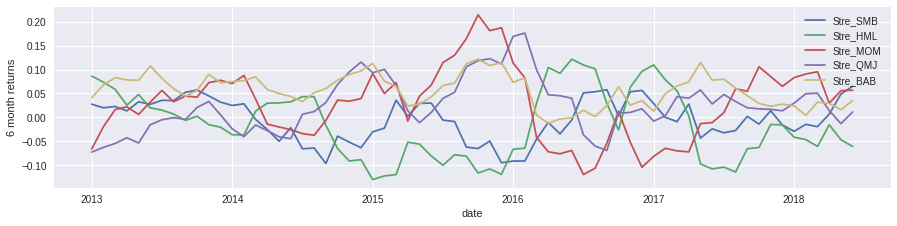

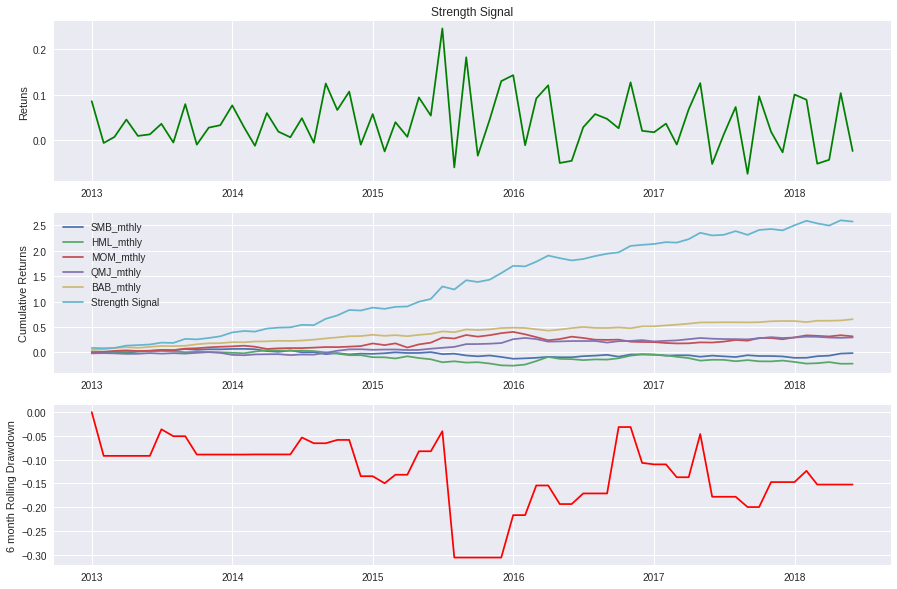

In [60]:
ax=relstr_sig_raw_test.plot(figsize = (15, 10/3.))
ax.set(xlabel="date", ylabel="6 month returns")
signal_plot(signal_ret_test['Strength Signal'],fac_test)

In [120]:
combined_ret_test = signal_ret_test.mean(axis=1)
combined_ret_test.name = 'Combined Portfolio'
combined_ret_test.tail()

TIME
2018-02-01    0.045135
2018-03-01   -0.031437
2018-04-01   -0.034369
2018-05-01    0.036640
2018-06-01   -0.023685
Freq: MS, Name: Combined Portfolio, dtype: float64

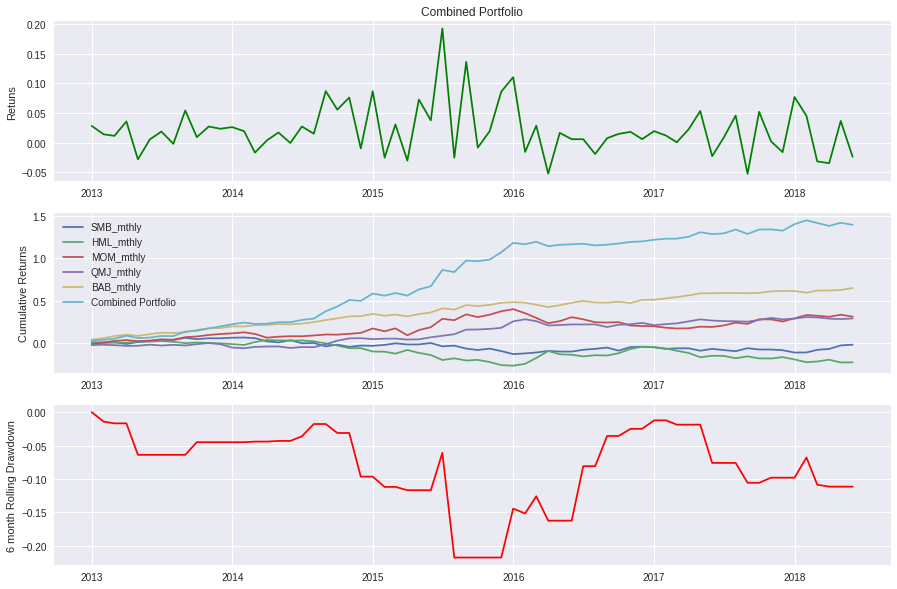

In [121]:
signal_plot(combined_ret_test,fac_test)

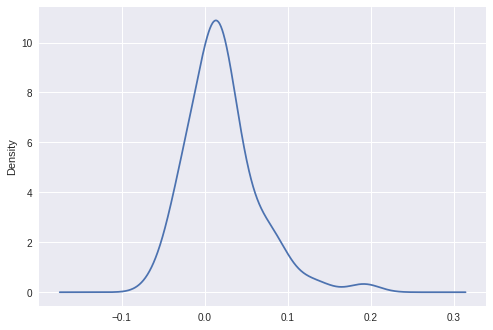

In [122]:
combined_ret_test.plot(kind = 'kde');

In [123]:
pivot = pd.DataFrame(columns = eco_sig_test.columns)
pivot.at['Eco Signal'] = eco_sig_test.iloc[-1,:].tolist()
pivot.at['Turb Signal'] = turb_sig_test.iloc[-1,:].tolist()
pivot.at['Disp Signal'] = disp_sig_test.iloc[-1,:].tolist()
pivot.at['Strength Signal'] = relstr_sig_test.iloc[-1,:].tolist()
pivot = pivot.transpose()
pivot['Combined'] = pivot.mean(axis = 1)
pivot

,Eco Signal,Turb Signal,Disp Signal,Strength Signal,Combined
SMB_rank,-1.0,-1.0,-1.0,1.0,-0.50
HML_rank,-1.0,-1.0,1.0,-1.0,-0.50
MOM_rank,1.0,1.0,1.0,1.0,1.00
QMJ_rank,1.0,0.0,-1.0,-1.0,-0.25
BAB_rank,0.0,1.0,0.0,0.0,0.25


In [136]:
combined_turn = (eco_sig_test+turb_sig_test+disp_sig_test+relstr_sig_test)/4
combined_turn = abs(combined_turn.diff())
combined_turn['Turnover'] = combined_turn.sum(axis = 1)/2
combined_turn.tail()

,SMB_rank,HML_rank,MOM_rank,QMJ_rank,BAB_rank,Turnover
TIME,,,,,,
2018-02-01,0.0,0.0,0.0,0.00,0.00,0.0
2018-03-01,0.0,0.0,0.0,0.00,0.00,0.0
2018-04-01,0.0,0.0,0.5,0.50,0.00,0.5
2018-05-01,0.5,0.5,0.5,0.25,0.25,1.0
2018-06-01,0.0,0.5,0.0,0.50,0.00,0.5


**Regressing Best Factor Against Signals**

In [0]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [0]:
#Best Factor: df output variable
df_matrix_turb['output'] = 0
df_matrix_turb['output'][df_matrix_turb['SMB_rank']==5] = 0
df_matrix_turb['output'][df_matrix_turb['HML_rank']==5] = 1
df_matrix_turb['output'][df_matrix_turb['MOM_rank']==5] = 2
df_matrix_turb['output'][df_matrix_turb['QMJ_rank']==5] = 3
df_matrix_turb['output'][df_matrix_turb['BAB_rank']==5] = 4

#Worst factor: df output_2 variable
df_matrix_turb['output_2'] = 0
df_matrix_turb['output_2'][df_matrix_turb['SMB_rank']==1] = 0
df_matrix_turb['output_2'][df_matrix_turb['HML_rank']==1] = 1
df_matrix_turb['output_2'][df_matrix_turb['MOM_rank']==1] = 2
df_matrix_turb['output_2'][df_matrix_turb['QMJ_rank']==1] = 3
df_matrix_turb['output_2'][df_matrix_turb['BAB_rank']==1] = 4


In [204]:
Y = df_matrix_turb.loc[disp_rel.index.year<=2012,'output'].values
X = signal_ret.values
X = add_constant(X)
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()
print(mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 1.525346
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  552
Model:                        MNLogit   Df Residuals:                      536
Method:                           MLE   Df Model:                           12
Date:                Thu, 20 Sep 2018   Pseudo R-squ.:                 0.01041
Time:                        07:23:08   Log-Likelihood:                -841.99
converged:                       True   LL-Null:                       -850.85
                                        LLR p-value:                    0.1245
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5999      0.158      3.791      0.000       0.290       0.910
x1            -3.1470      2.

In [205]:
Y = df_matrix_turb.loc[disp_rel.index.year<=2012,'output_2'].values
X = signal_ret.values
X = sm.add_constant(X)
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()
print(mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 1.522657
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  552
Model:                        MNLogit   Df Residuals:                      536
Method:                           MLE   Df Model:                           12
Date:                Thu, 20 Sep 2018   Pseudo R-squ.:                 0.01201
Time:                        07:23:09   Log-Likelihood:                -840.51
converged:                       True   LL-Null:                       -850.72
                                        LLR p-value:                   0.05929
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1023      0.118     -0.867      0.386      -0.334       0.129
x1            -0.0132      2.

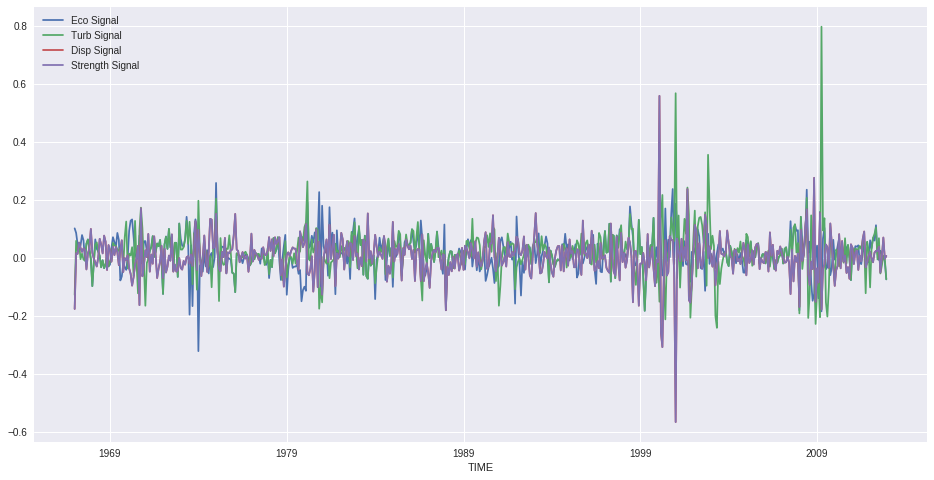

In [206]:
signal_ret.plot(figsize = (16,8));

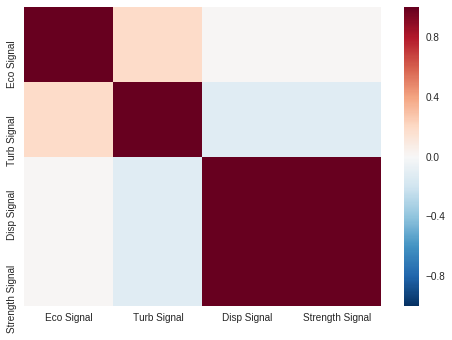

In [207]:
corr = signal_ret.corr()

#plot the heatmap

sns.heatmap(corr);

In [208]:
corr

,Eco Signal,Turb Signal,Disp Signal,Strength Signal
Eco Signal,1.000000,0.194971,0.008967,0.008967
Turb Signal,0.194971,1.000000,-0.123866,-0.123866
Disp Signal,0.008967,-0.123866,1.000000,1.000000
Strength Signal,0.008967,-0.123866,1.000000,1.000000


** Refinement of Signal**

In [0]:
path = 'all_signals.xlsx'
writer = pd.ExcelWriter(path)
combined_ret.to_excel(writer)
writer.save()

from google.colab import files
uploaded = files.download(path)

In [0]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

scores = mul_lr.fit(combined_ret,df_matrix_turb.loc[disp_rel.index.year<=2012,'output'])

# Print the accuracy
print(mul_lr.score(signal_ret_test, y_test1))

In [130]:
combined_ret

,Eco cycle,Turbulence,Dispersion,Rel strength
TIME,,,,
1967-01-01,0.100986,0.010864,0.079569,-0.010864
1967-02-01,0.085258,0.132990,-0.049962,0.140728
1967-03-01,0.045862,0.064565,0.162681,0.264317
1967-04-01,0.023341,0.090925,0.030300,0.236561
1967-05-01,0.041919,0.102676,0.145824,0.274276
1967-06-01,0.077945,0.138483,0.115776,0.243047
1967-07-01,0.059675,0.118474,0.109700,0.236468
1967-08-01,-0.010365,0.026529,0.063909,0.215809
1967-09-01,0.048345,0.018653,0.055117,0.147146
